In [ ]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer
!pip install qiskit matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=8e44ca3d56ad7b751138806094d9ab760d2b3738073f03f45774f5b008c68161
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.5 MB/s eta 0:00:00


In [ ]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

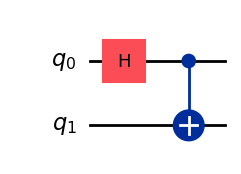

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [ ]:
from IPython.display import display, Math
import sympy as sp

statevector = Statevector(qc)
coefficients = statevector.data

latex_statevector = r' + '.join([
    r'\frac{1}{\sqrt{2}}' + r'\left|{0:0{width}b}\right\rangle'.format(i, width=2)
    for i, c in enumerate(coefficients) if abs(c) > 0
])

display(Math(latex_statevector))

<IPython.core.display.Math object>

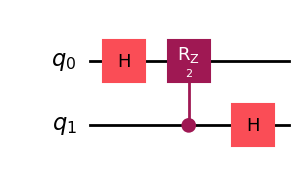

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
def create_controlled_rk_gate(k):
    # Calculate the angle theta = 2*pi / 2^k
    angle = (2 * 3.14159) / (2**k)
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.crz(k, 1, 0)
    qc.h(1)
    return qc
k = 2
controlled_rk_circuit = create_controlled_rk_gate(k)

circuit_drawer(controlled_rk_circuit, output='mpl')


In [ ]:
from IPython.display import display, Math
import sympy as sp
qc.x(0)
qc.x(1)
statevector = Statevector(qc)
coefficients = statevector.data

latex_statevector = r' + '.join([
    r'\frac{1}{\sqrt{2}}' + r'\left|{0:0{width}b}\right\rangle'.format(i, width=2)
    for i, c in enumerate(coefficients) if abs(c) > 0
])

display(Math(latex_statevector))

<IPython.core.display.Math object>

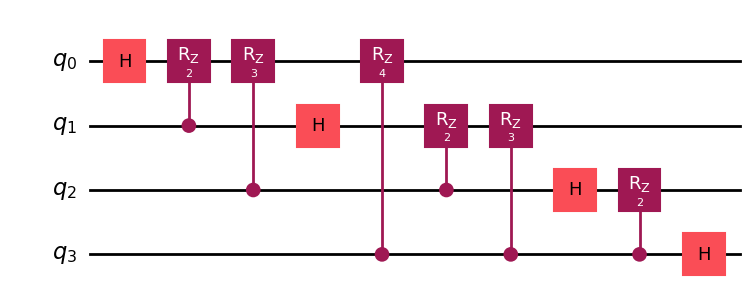

In [ ]:
qc = QuantumCircuit(4)
qc.h(0)
qc.crz(2, 1, 0)
qc.crz(3, 2, 0)
qc.crz(4, 3, 0)
qc.h(1)
qc.crz(2, 2, 1)
qc.crz(3, 3, 1)
qc.h(2)
qc.crz(2, 3, 2)
qc.h(3)
qc.draw('mpl')


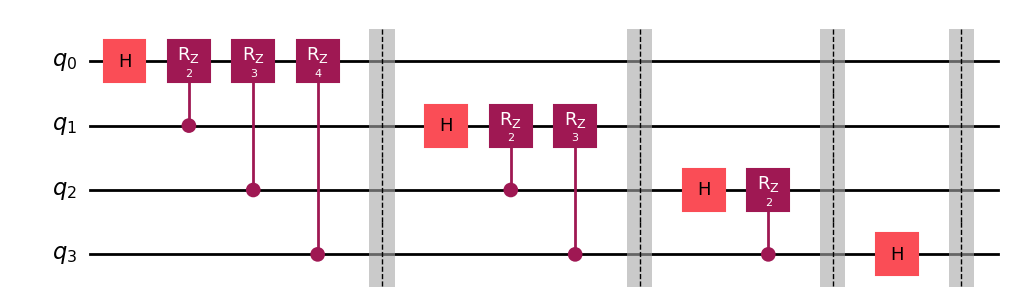

In [ ]:
n = 4
qc = QuantumCircuit(n)

def apply_controlled_Rk(qc, control_qubit, target_qubit, k):
    qc.crz(k, control_qubit, target_qubit)

for i in range(n):
    qc.h(i)
    for j in range(i+1, n):
        apply_controlled_Rk(qc, j, i, j-i+1)
    qc.barrier()

qc.draw('mpl')

In [ ]:
from IPython.display import display, Math
from qiskit.quantum_info import Statevector
import math

statevector = Statevector(qc)
coefficients = statevector.data

n_qubits = len(bin(len(coefficients) - 1)) - 2

common_amplitude = r'\frac{1}{\sqrt{2^{' + str(n_qubits) + '}}}'

latex_statevector = r' \left( ' + ' + '.join([
    common_amplitude + r' \left| {0:0{width}b} \right\rangle'.format(i, width=n_qubits)
    for i, c in enumerate(coefficients) if abs(c) > 0
]) + r' \right)'

display(Math(latex_statevector))

<IPython.core.display.Math object>

In [ ]:
from IPython.display import display, Math
from qiskit.quantum_info import Statevector
import math

# Assuming 'qc' is the QuantumCircuit defined earlier and has been executed to generate the state
statevector = Statevector(qc)
coefficients = statevector.data

# Number of qubits
n_qubits = len(bin(len(coefficients) - 1)) - 2

# Common amplitude
common_amplitude = r'\frac{1}{\sqrt{2^{' + str(n_qubits) + '}}}'

# Initialize the LaTeX string for the product form
latex_statevector = r' ' + common_amplitude + ' \prod_{i=0}^{' + str(n_qubits - 1) + '} \left( |0 \rangle + e^{i 2\pi \theta_i} |1 \rangle \right)'

# Loop over the coefficients to extract the amplitude and phase
product_terms = []
for i, c in enumerate(coefficients):
    if abs(c) > 0:  # Only consider non-zero coefficients
        phase = math.atan2(c.imag, c.real)  # Compute the phase (argument of the complex number)
        # Format each term as |0> + e^(i*2*pi*phase)*|1>
        term = r'\left( |0 \rangle + e^{i 2\pi ' + f'{phase:.4f}' + r'} |1 \rangle \right)'
        product_terms.append(term)

# Combine all terms in a product form
latex_statevector = r' ' + common_amplitude + ''.join(product_terms)

# Display the LaTeX expression
display(Math(latex_statevector))


<IPython.core.display.Math object>

In [ ]:
def show_states_for_qubits():
    num_qubits = int(input("Enter the number of qubits: "))

    states = []
    for i in range(2 ** num_qubits):
        binary_state = f"{i:0{num_qubits}b}"
        states.append(binary_state)

    print("The quantum states are:")
    print("  ".join(states))

show_states_for_qubits()

Enter the number of qubits: 4
The quantum states are:
0000  0001  0010  0011  0100  0101  0110  0111  1000  1001  1010  1011  1100  1101  1110  1111


In [ ]:
def show_states_for_qubits(num_qubits):
    states = []
    for i in range(2 ** num_qubits):
        binary_state = f"{i:0{num_qubits}b}"
        states.append(binary_state)

    print("The quantum states are:")
    print("  ".join(states))
    return states

def generate_circuit_for_state(state, num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i, bit in enumerate(state):
        if bit == '1':
            qc.x(i)
    return qc

def main():
    num_qubits = int(input("Enter the number of qubits: "))

    states = show_states_for_qubits(num_qubits)

    state_input = input("\nEnter a specific state (binary representation): ")

    if state_input not in states:
        print(f"Invalid state! Please enter a state from the list.")
        return

    qc = generate_circuit_for_state(state_input, num_qubits)
    print("\nThe quantum circuit for the state is:")
    print(qc.draw('text'))
main()

Enter the number of qubits: 5
The quantum states are:
00000  00001  00010  00011  00100  00101  00110  00111  01000  01001  01010  01011  01100  01101  01110  01111  10000  10001  10010  10011  10100  10101  10110  10111  11000  11001  11010  11011  11100  11101  11110  11111

Enter a specific state (binary representation): 00011

The quantum circuit for the state is:
          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘


Enter the number of qubits: 4
The quantum states are:
0000  0001  0010  0011  0100  0101  0110  0111  1000  1001  1010  1011  1100  1101  1110  1111

Enter a specific state (binary representation): 0101

The quantum circuit for the QFT is:


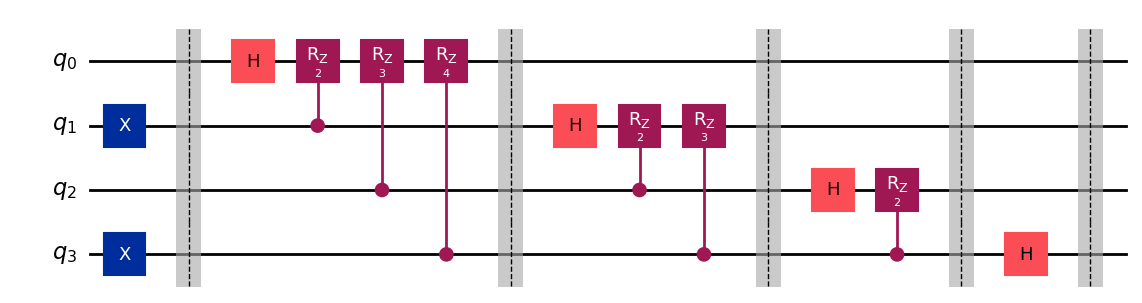

In [ ]:
from qiskit import QuantumCircuit

def apply_controlled_Rk(qc, control_qubit, target_qubit, k):
    qc.crz(k, control_qubit, target_qubit)

def show_states_for_qubits(num_qubits):
    states = []
    for i in range(2 ** num_qubits):
        binary_state = f"{i:0{num_qubits}b}"
        states.append(binary_state)
    print("The quantum states are:")
    print("  ".join(states))
    return states

def generate_qft_circuit(state, num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i, bit in enumerate(state):
        if bit == '1':
            qc.x(i)
    qc.barrier()
    for i in range(num_qubits):
        qc.h(i)
        for j in range(i + 1, num_qubits):
            apply_controlled_Rk(qc, j, i, (j - i + 1))
        qc.barrier()
    return qc

num_qubits = int(input("Enter the number of qubits: "))
states = show_states_for_qubits(num_qubits)
state_input = input("\nEnter a specific state (binary representation): ")

qc = generate_qft_circuit(state_input, num_qubits)
print("\nThe quantum circuit for the QFT is:")
qc.draw('mpl')


In [ ]:
from IPython.display import display, Math
from qiskit.quantum_info import Statevector
import math

statevector = Statevector(qc)
coefficients = statevector.data
n_qubits = len(bin(len(coefficients) - 1)) - 2

common_amplitude = r'\frac{1}{\sqrt{2^{' + str(n_qubits) + '}}}'

latex_statevector = r' ' + common_amplitude + ' \prod_{i=0}^{' + str(n_qubits - 1) + '} \left( |0 \rangle + e^{i 2\pi \theta_i} |1 \rangle \right)'

product_terms = []
for i, c in enumerate(coefficients):
    if abs(c) > 0:
        phase = math.atan2(c.imag, c.real)
        term = r'\left( |0 \rangle + e^{i 2\pi ' + f'{phase:.4f}' + r'} |1 \rangle \right)'
        product_terms.append(term)

latex_statevector = r' ' + common_amplitude + ''.join(product_terms)

display(Math(latex_statevector))


<IPython.core.display.Math object>

In [ ]:
from IPython.display import display, Math
from qiskit.quantum_info import Statevector
import math

statevector = Statevector(qc)
coefficients = statevector.data

n_qubits = len(bin(len(coefficients) - 1)) - 2

common_amplitude = r'\frac{1}{\sqrt{2^{' + str(n_qubits) + '}}}'

latex_statevector = r' \left( ' + ' + '.join([
    common_amplitude + r' \left| {0:0{width}b} \right\rangle'.format(i, width=n_qubits)
    for i, c in enumerate(coefficients) if abs(c) > 0
]) + r' \right)'

display(Math(latex_statevector))

<IPython.core.display.Math object>

In [ ]:
import math

def qft_of_state(binary_state, n_qubits):
    decimal_value = int(binary_state, 2)
    N = 2 ** n_qubits
    amplitude = r"\frac{1}{\sqrt{" + str(N) + "}}"

    terms = []
    for k in range(N):
        phase = (2 * math.pi * decimal_value * k) / N
        # Corrected the phase term in the exponent
        term = f"e^{{i2\\pi({decimal_value * k}/{N})}}"
        terms.append(f"{term} |{k:0{n_qubits}b}⟩")  # Format k as binary

    qft_result = f"{amplitude} \\left( " + " + ".join(terms) + " \\right)"
    return qft_result

states = ["000", "001", "010", "011", "100", "101", "110", "111"]
n_qubits = 3

for state in states:
    qft_output = qft_of_state(state, n_qubits)
    from IPython.display import display, Math
    print(f"\nQFT for state {state}:")
    display(Math(qft_output))  # Removed the extra 1/2 factor


QFT for state 000:


<IPython.core.display.Math object>


QFT for state 001:


<IPython.core.display.Math object>


QFT for state 010:


<IPython.core.display.Math object>


QFT for state 011:


<IPython.core.display.Math object>


QFT for state 100:


<IPython.core.display.Math object>


QFT for state 101:


<IPython.core.display.Math object>


QFT for state 110:


<IPython.core.display.Math object>


QFT for state 111:


<IPython.core.display.Math object>

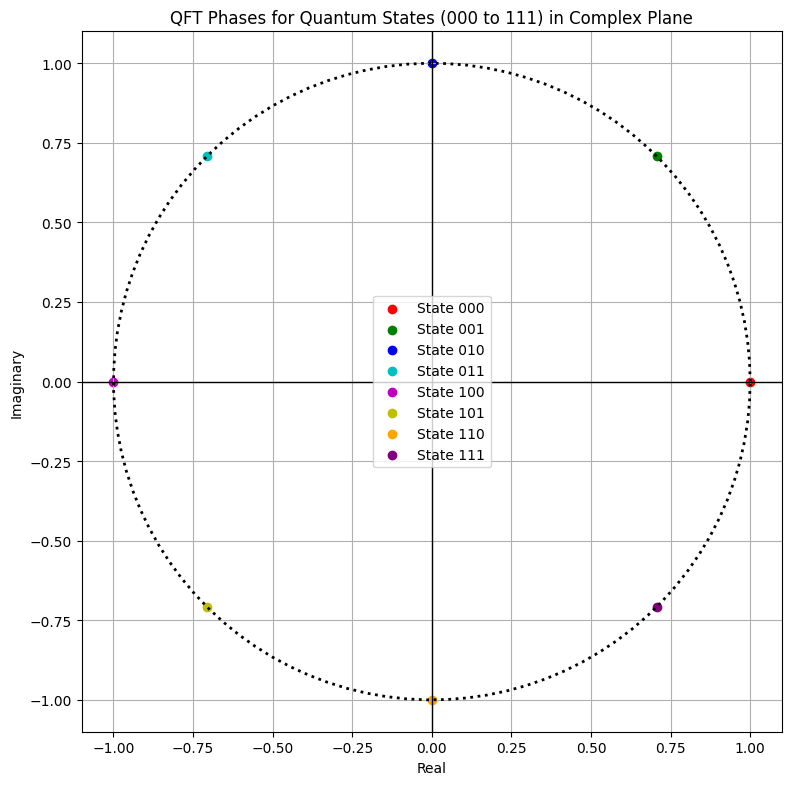

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def qft_phase_for_state(N=8):
    # Calculate the phases corresponding to the states
    phases = [(k / N) for k in range(N)]  # Equally spaced phases for 8 states
    return phases

N = 8
states = ['000', '001', '010', '011', '100', '101', '110', '111']

# Get phases for each state
phases = qft_phase_for_state(N)

# Plotting
plt.figure(figsize=(8, 8))

# Define colors for each point
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'purple']

# Plot the points on the unit circle
for i, phase in enumerate(phases):
    real_part = np.cos(2 * np.pi * phase)
    imag_part = np.sin(2 * np.pi * phase)

    plt.scatter(real_part, imag_part, color=colors[i], label=f"State {states[i]}")

# Create the dotted circle connecting the points
theta = np.linspace(0, 2 * np.pi, 100)  # For the circle
x_circle = np.cos(theta)
y_circle = np.sin(theta)

plt.plot(x_circle, y_circle, 'k:', lw=2)  # Dotted circle

plt.title('QFT Phases for Quantum States (000 to 111) in Complex Plane')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


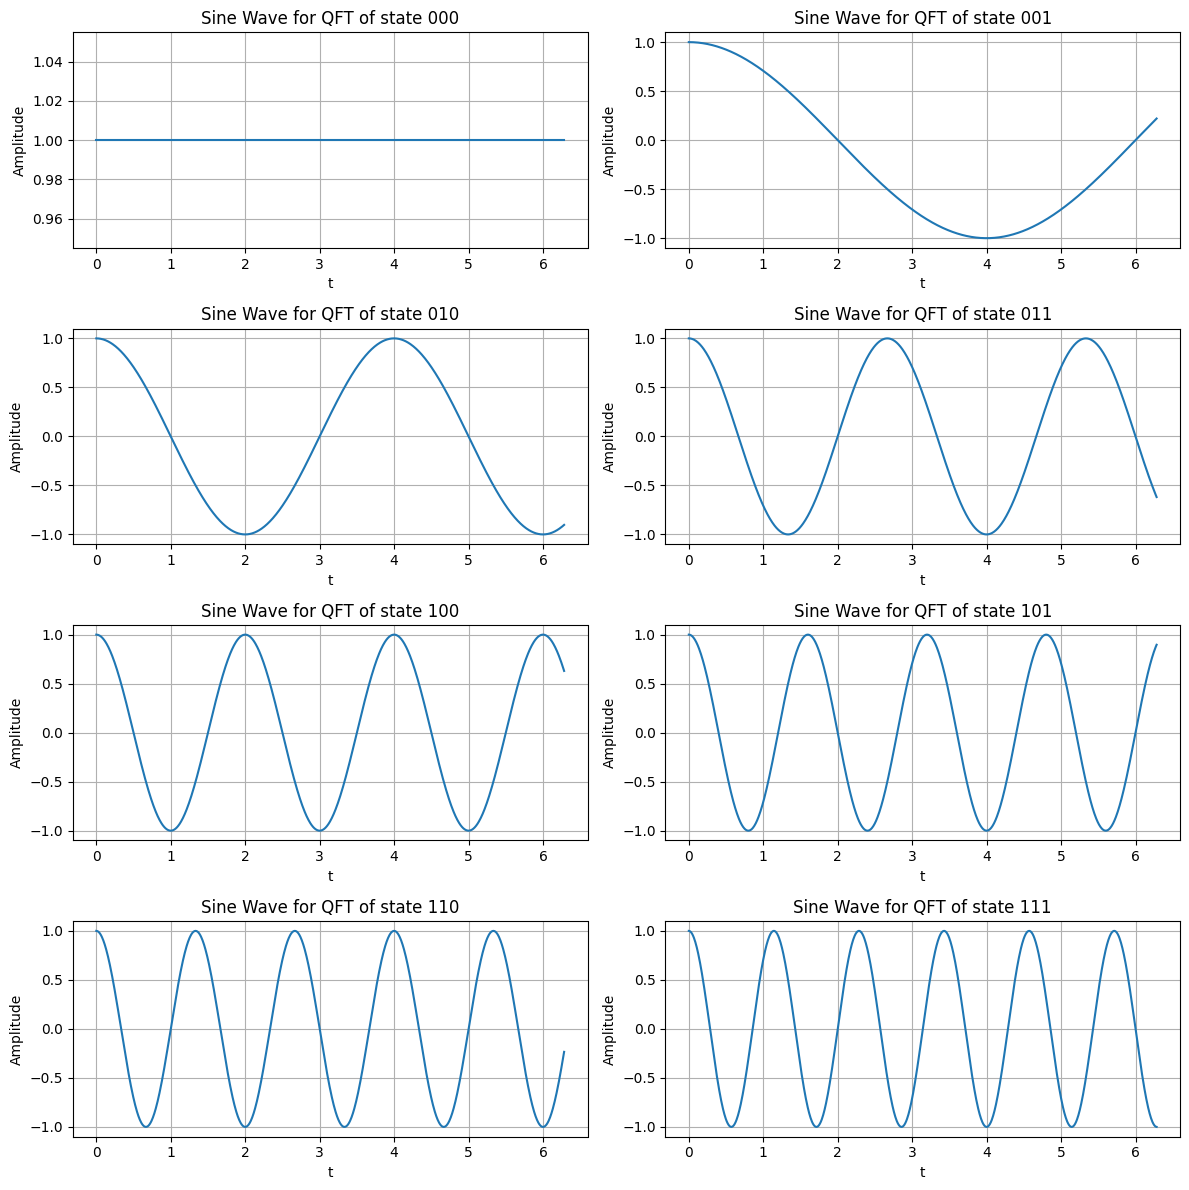

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of states (for 3 qubits, we have 8 states)
N = 8

# States (binary representations)
states = ['000', '001', '010', '011', '100', '101', '110', '111']

# Calculate the phases for each state and plot the corresponding sine wave
plt.figure(figsize=(12, 12))

for idx, state in enumerate(states):
    k = idx  # state index (0 to 7)
    theta = k / N  # Phase value for each state

    # Create a sine wave based on the real part of the complex exponential
    t = np.linspace(0, 2 * np.pi, 1000)  # Time variable for plotting
    real_part = np.cos(2 * np.pi * theta * t)  # Real part of e^(i * 2*pi*theta)

    plt.subplot(4, 2, idx + 1)  # Create a subplot for each state
    plt.plot(t, real_part, label=f'Phase: {theta:.2f} (State {state})')
    plt.title(f'Sine Wave for QFT of state {state}')
    plt.xlabel('t')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


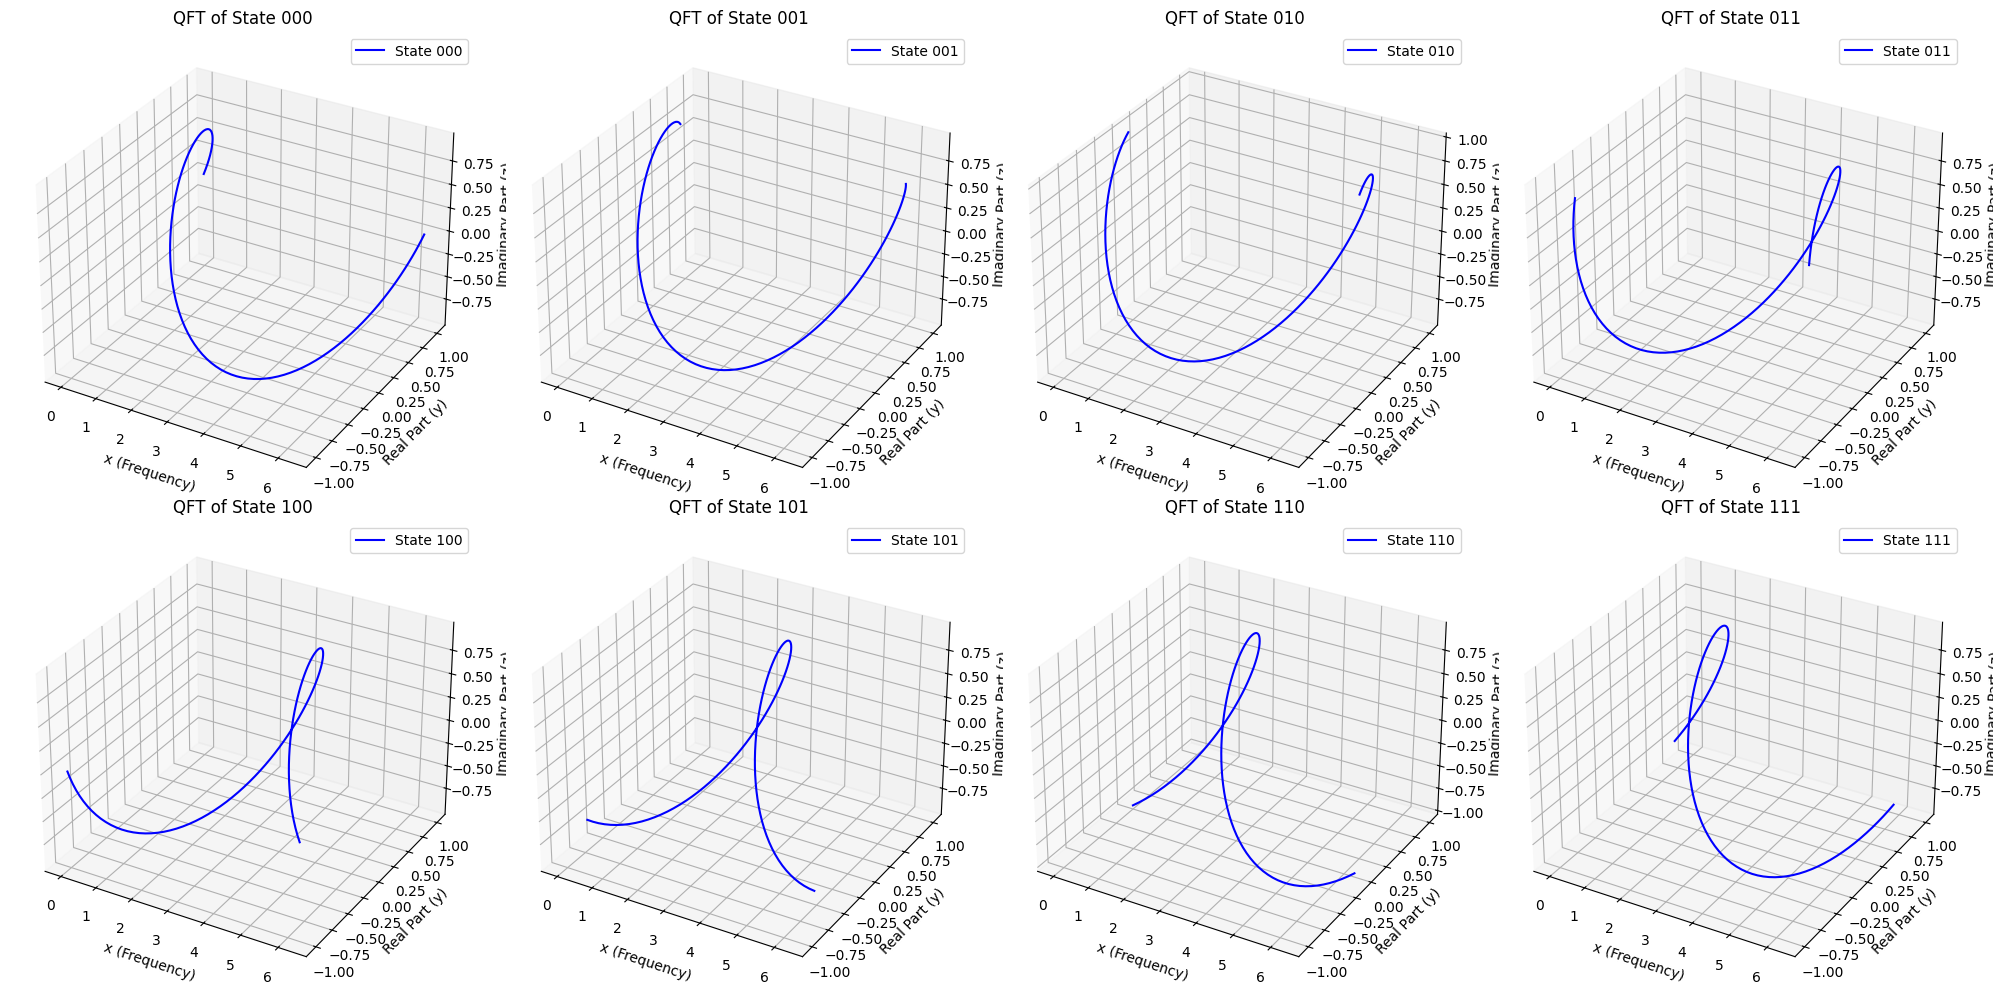

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of states (for 3 qubits, we have 8 states)
N = 8

# States (binary representations)
states = ['000', '001', '010', '011', '100', '101', '110', '111']

# Create a figure for plotting multiple 3D plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each state and plot
for k, state in enumerate(states):
    # Phase corresponding to the state
    theta = k / N

    # Generate the x values (this represents a "time" or position along the wave)
    x_vals = np.linspace(0, 2 * np.pi, 100)

    # Calculate the real and imaginary parts of e^(i*2*pi*theta) for each x
    real_part = np.cos(x_vals + 2 * np.pi * theta)
    imaginary_part = np.sin(x_vals + 2 * np.pi * theta)

    # Select the appropriate subplot
    ax = axes[k]

    # Plotting the waveform in 3D (real vs. imaginary vs. x)
    ax.plot(x_vals, real_part, imaginary_part, label=f'State {state}', color='b')
    ax.set_title(f'QFT of State {state}')
    ax.set_xlabel('x (Frequency)')
    ax.set_ylabel('Real Part (y)')
    ax.set_zlabel('Imaginary Part (z)')

    # Add legend
    ax.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


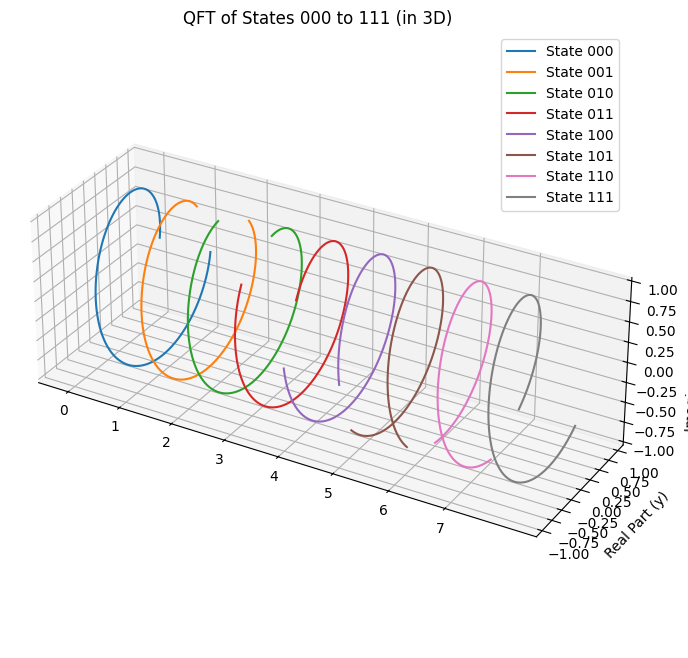

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 8
states = ['000', '001', '010', '011', '100', '101', '110', '111']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for k, state in enumerate(states):
    theta = k / N
    x_vals = np.linspace(0, 2 * np.pi, 100)
    real_part = np.cos(x_vals + 2 * np.pi * theta)
    imaginary_part = np.sin(x_vals + 2 * np.pi * theta)
    shifted_x_vals = x_vals + k * 2 * np.pi
    ax.plot(shifted_x_vals, real_part, imaginary_part, label=f'State {state}')


ax.set_ylabel('Real Part (y)')
ax.set_zlabel('Imaginary Part (z)')
ax.set_title("QFT of States 000 to 111 (in 3D)")

ax.set_xticks([k * 2 * np.pi for k in range(N)])
ax.set_xticklabels([str(i) for i in range(N)])

ax.legend()
ax.set_box_aspect([3, 1, 1])

plt.show()
